<a href="https://colab.research.google.com/github/yarusx/cat_vs_dogo/blob/main/cats_dogs_breed_id.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
import pathlib

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/MyDrive/images2.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/Dog/newfoundland/newfoundland_39.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_39.jpg  
  inflating: images/Dog/newfoundland/newfoundland_38.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_38.jpg  
  inflating: images/Dog/newfoundland/newfoundland_10.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_10.jpg  
  inflating: images/Dog/newfoundland/newfoundland_3.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_3.jpg  
  inflating: images/Dog/newfoundland/newfoundland_144.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_144.jpg  
  inflating: images/Dog/newfoundland/newfoundland_150.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_150.jpg  
  inflating: images/Dog/newfoundland/newfoundland_178.jpg  
  inflating: __MACOSX/images/Dog/newfoundland/._newfoundland_178.jpg  
  inflating: images/Dog/newfoundland/newfo

In [4]:
data_dir = pathlib.Path('/content/images')

In [5]:
image_count = len(list(data_dir.glob('*/*/*.jpg')))
print(image_count)

7390


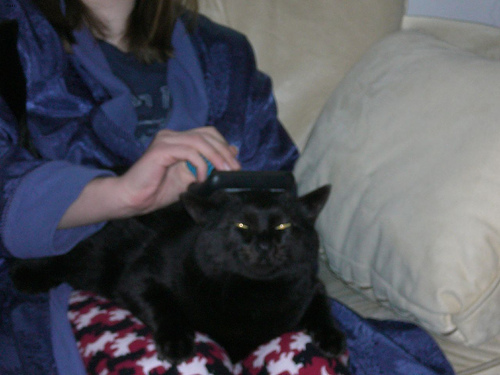

In [6]:
Cats = list(data_dir.glob('Cat/*/*'))
PIL.Image.open(str(Cats[0]))

In [7]:
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

In [8]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='int',
  class_names = ['Cat','Dog'],
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 7390 files belonging to 2 classes.
Using 5912 files for training.


In [9]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='int',
  class_names = ['Cat','Dog'],
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE)

Found 7390 files belonging to 2 classes.
Using 1478 files for validation.


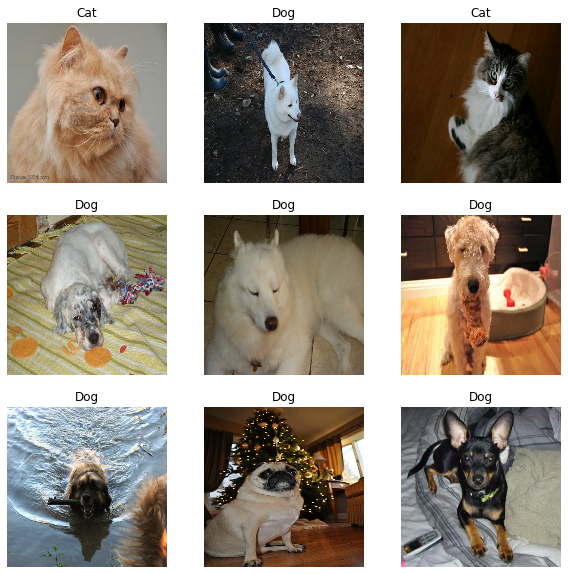

In [10]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
print(class_names)

['Cat', 'Dog']


In [13]:
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

In [14]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 31
Number of test batches: 7


In [15]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [16]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
])

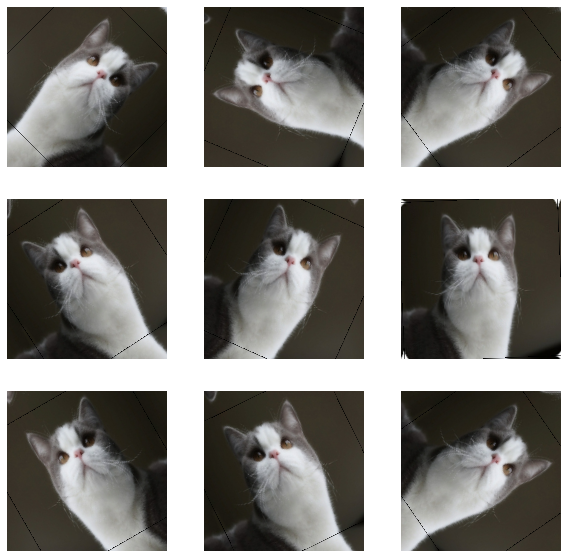

In [17]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [19]:
#preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1)

In [20]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step
